In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [2]:
#carregando base de dados
base = pd.read_csv('StudentsPerformance.csv', names=['genero', 'race/ethnicity', 'educacao_dos_pais', 
                                                     'almoco', 'prepacao','matematica', 'leitura', 'escrita'], header=0)
base = base.drop(['race/ethnicity'], axis=1)

#esta foi uma base utilizada para armazenar a nota de teste de algums alunos
#contendo notas de matematica, leitura e escrita e outros dados adicionais que podemos correlacionar
base.head().T

,0,1,2,3,4
genero,female,female,female,male,male
educacao_dos_pais,bachelor's degree,some college,master's degree,associate's degree,some college
almoco,standard,standard,standard,free/reduced,standard
prepacao,none,completed,none,none,none
matematica,72,69,90,47,76
leitura,72,90,95,57,78
escrita,74,88,93,44,75


In [3]:
#verificando tamanho da base
base.shape

(1000, 7)

In [4]:
#verificando variaveis
base.dtypes

genero               object
educacao_dos_pais    object
almoco               object
prepacao             object
matematica            int64
leitura               int64
escrita               int64
dtype: object

In [5]:
#buscando valores não preenchidos ou nullos
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   genero             1000 non-null   object
 1   educacao_dos_pais  1000 non-null   object
 2   almoco             1000 non-null   object
 3   prepacao           1000 non-null   object
 4   matematica         1000 non-null   int64 
 5   leitura            1000 non-null   int64 
 6   escrita            1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [6]:
#medidas estatisticas
base['matematica'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: matematica, dtype: float64

In [7]:
base['escrita'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: escrita, dtype: float64

In [8]:
base['leitura'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: leitura, dtype: float64

# **Contagem de Dados**

In [9]:
#caso ache conveniente é possivel verificar o valore em porcentagem utilizando :
# (base.genero.value_counts() * base.shape[0] ) *100
base.genero.value_counts()

female    518
male      482
Name: genero, dtype: int64

In [10]:
base.educacao_dos_pais.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: educacao_dos_pais, dtype: int64

In [11]:
base.prepacao.value_counts()

none         642
completed    358
Name: prepacao, dtype: int64

# **Primeiras analises**
- pergunte sobre o que quer descobrir

In [12]:
#em uma analise exploratoria apos filtrarmos os dados é uma boa pratica se perguntar oq esta buscando 
#para criarmos graficos e encotrar alguma informação valiosa 
sns.set(style='darkgrid')

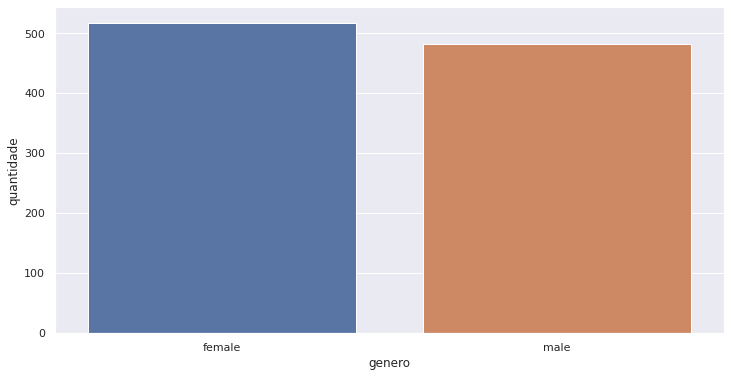

In [13]:
#será que esta base possui a mesma quantidade de homens que mulheres testados ? 
#visualizando a quantidade de pessoas separadas por genero
plt.figure(figsize=(12,6))
sns.countplot(x = base.genero)
plt.xlabel("genero")
plt.ylabel("quantidade")
plt.show()

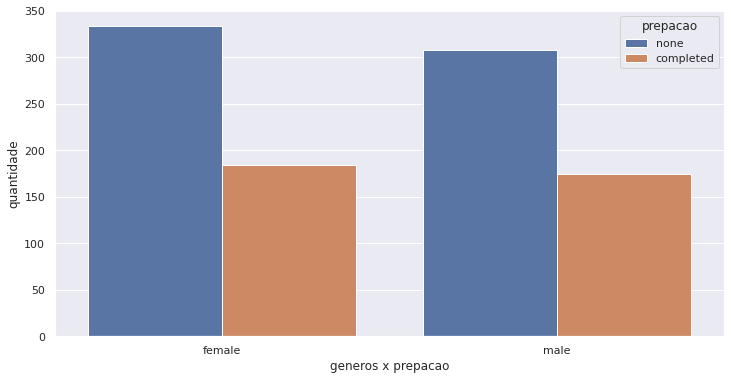

In [14]:
#será que as classes estudadas female/male se preparam para realizar este teste ?
#visualizando quantidade de pessoas separadas por grupo em seus repectivos generos
plt.figure(figsize=(12,6))
sns.countplot(x = base.genero, hue= base.prepacao)
plt.xlabel("generos x prepacao")
plt.ylabel("quantidade")
plt.show()

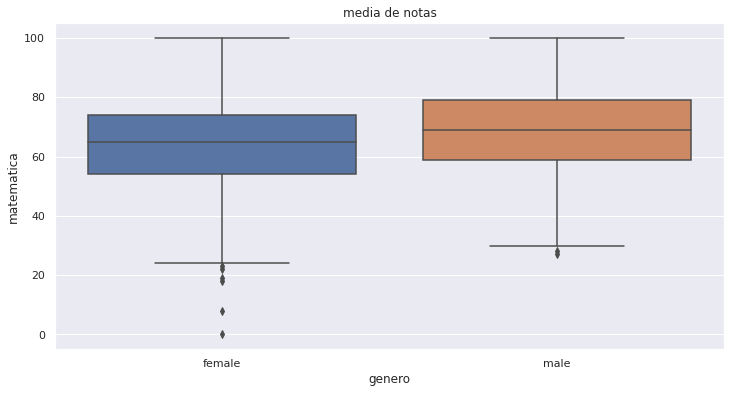

In [15]:
#qual das classes estudadas female/male consegui a maior media em matematica ?
#analisando media de notas de notas em matematica para cada genero na base
plt.figure(figsize=(12,6))
sns.boxplot(x=base.genero , y=base.matematica)
plt.title("media de notas")
plt.show()
#aparentemente temos a presença de outliers

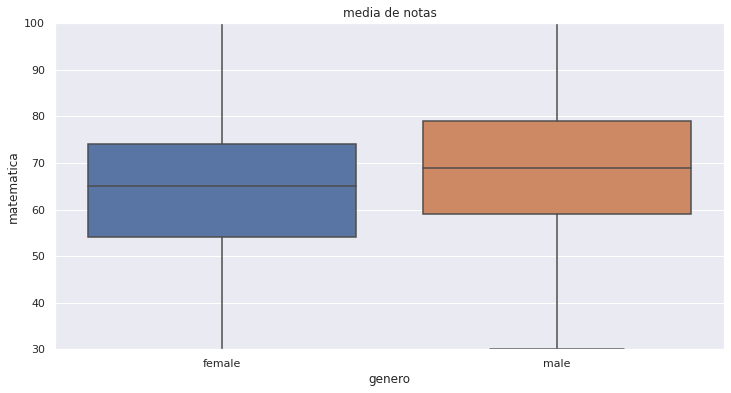

In [16]:
#analisando media de notas de notas em matematica para cada genero na base
#removendo outliers
plt.figure(figsize=(12,6))
sns.boxplot(x=base.genero , y=base.matematica)
plt.ylim(30, 100)
plt.title("media de notas")
plt.show()

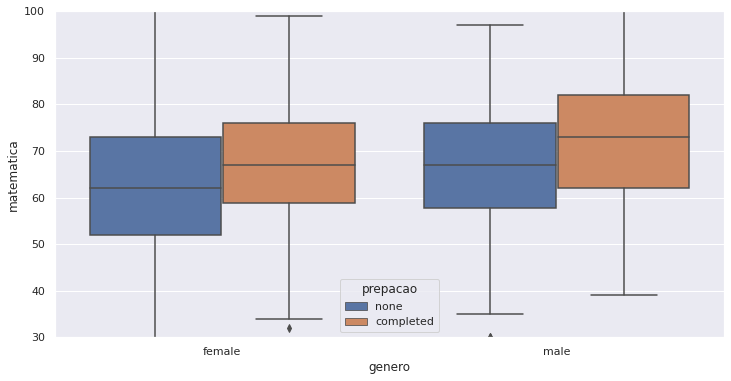

In [17]:
#será que a media em matematica das pessoas que se preparam para a prova é maior ?
#unindo todas as contagens
plt.figure(figsize=(12, 6))
sns.boxplot(x=base.genero, y=base.matematica, hue=base.prepacao)
plt.ylim(30, 100)
plt.show()

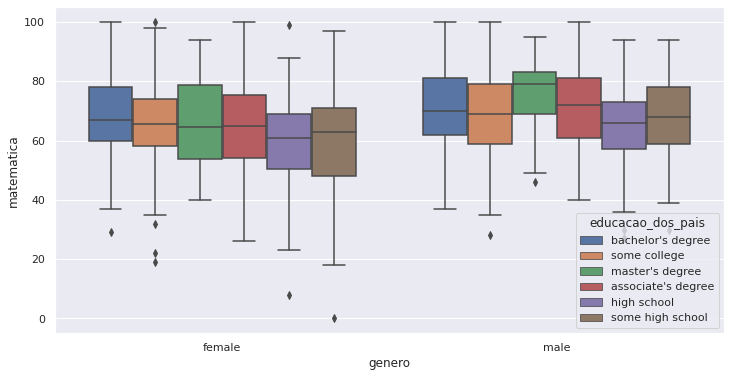

In [18]:
#será que a escolaridade dos pais pode influenciar diretamente na media dos alunos ? 
#unindo todas as contagens
plt.figure(figsize=(12, 6))
sns.boxplot(x=base.genero, y=base.matematica, hue=base.educacao_dos_pais)

plt.show()

# **Agrupamentos**
-unindo as variaveis e retitando valores descritivos

In [19]:
#como aparente o grafico mostrou que escolaridade dos pais pode afetar a media dos alunos vamos unilos e descobrir as maiores notas 
base.groupby('genero').agg({'matematica': 'mean'})

,matematica
genero,
female,63.633205
male,68.728216


In [20]:
base.groupby(['genero', 'prepacao']).agg({'matematica': 'mean'})

matematica
genero prepacao             
female completed   67.195652
       none        61.670659
male   completed   72.339080
       none        66.688312

In [21]:
base.groupby(['genero', 'prepacao', 'educacao_dos_pais']).agg({'matematica': 'mean'})

matematica
genero prepacao  educacao_dos_pais             
female completed associate's degree   70.047619
                 bachelor's degree    71.000000
                 high school          61.896552
                 master's degree      69.857143
                 some college         67.928571
                 some high school     63.828571
       none      associate's degree   62.527027
                 bachelor's degree    66.926829
                 high school          58.215385
                 master's degree      64.363636
                 some college         64.013158
                 some high school     56.464286
male   completed associate's degree   73.700000
                 bachelor's degree    75.375000
                 high school          68.333333
                 master's degree      72.333333
                 some college         75.685714
                 some high school     69.095238
       none      associate's degree   68.984848
                 bachelor's degree    66.870968
                 high school          63.400000
                 master's degree      75.705882
                 some college         65.808219
                 some high school     66.695652

In [22]:
#aqui eu realizo um filtro para as classes female/male para encontrar notas maiores que 50
amostra_male = base[base['genero']=='male']
amostra_male = amostra_male.loc[(base.matematica >= 50)]

filtro_male = amostra_male.groupby(['genero','educacao_dos_pais']).agg({"matematica": "mean"})

filtro_male 
#aparentemente a hipotese estava correta 
#perceba que quando os pais possuem um bacharelado ou mestrado a media dos filhos possui um aumento

matematica
genero educacao_dos_pais             
male   associate's degree   74.000000
       bachelor's degree    72.725490
       high school          68.089888
       master's degree      77.428571
       some college         71.515152
       some high school     70.531646

In [23]:
amostra_female = base[base['genero']=='female']
amostra_female = amostra_female.loc[(base.matematica >= 50)]

filtro_female = amostra_female.groupby(['genero','educacao_dos_pais']).agg({"matematica": "mean"})

filtro_female

matematica
genero educacao_dos_pais             
female associate's degree   68.623762
       bachelor's degree    71.750000
       high school          65.364865
       master's degree      69.437500
       some college         68.523810
       some high school     68.031250

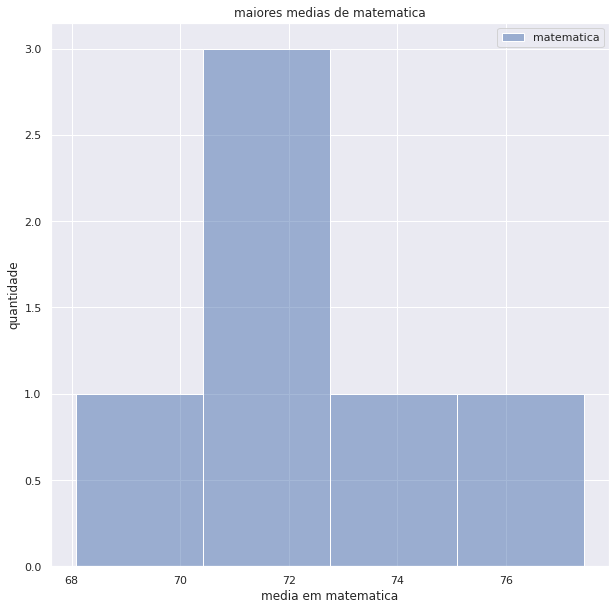

In [24]:
#histograma com maiores notas da classe male
plt.figure(figsize=(10, 10))
sns.histplot(filtro_male)
plt.title("maiores medias de matematica")
plt.xlabel("media em matematica")
plt.ylabel("quantidade")
plt.show()

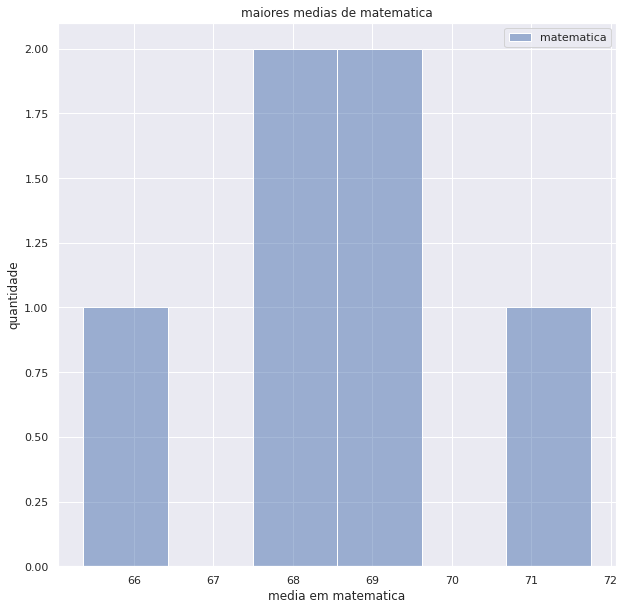

In [25]:
#histograma com maiores notas da classe male
plt.figure(figsize=(10, 10))
sns.histplot(filtro_female)
plt.title("maiores medias de matematica")
plt.xlabel("media em matematica")
plt.ylabel("quantidade")
plt.show()